<a href="https://colab.research.google.com/github/gnani321/basic-ds-/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel('EastWestAirlines.xlsx')

In [ ]:
data

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [ ]:
data.isna().sum()

,0
East-West Airlines is trying to learn more about its customers. Key issues are their,8
Unnamed: 1,13
Unnamed: 2,20
Unnamed: 3,13
Unnamed: 4,8


In [ ]:
#reading xslx file
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
data.isna().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [ ]:
data.dtypes

,0
ID#,int64
Balance,int64
Qual_miles,int64
cc1_miles,int64
cc2_miles,int64
cc3_miles,int64
Bonus_miles,int64
Bonus_trans,int64
Flight_miles_12mo,int64
Flight_trans_12,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
# drooping ID and cc2_miles,cc3_miles
data.drop(['ID#','cc2_miles','cc3_miles'],axis=1,inplace=True)

In [ ]:
data.head()

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,174,1,0,0,7000,0
1,19244,0,1,215,2,0,0,6968,0
2,41354,0,1,4123,4,0,0,7034,0
3,14776,0,1,500,1,0,0,6952,0
4,97752,0,4,43300,26,2077,4,6935,1


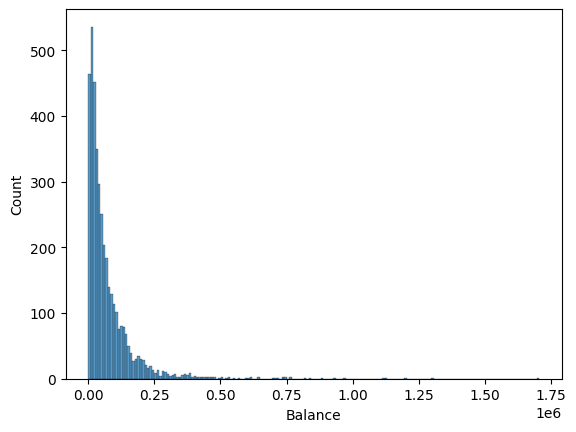

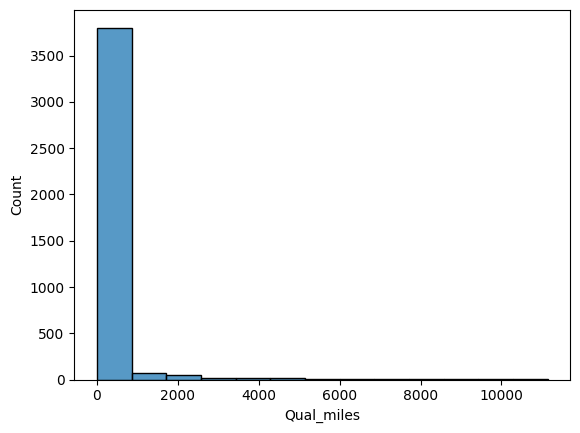

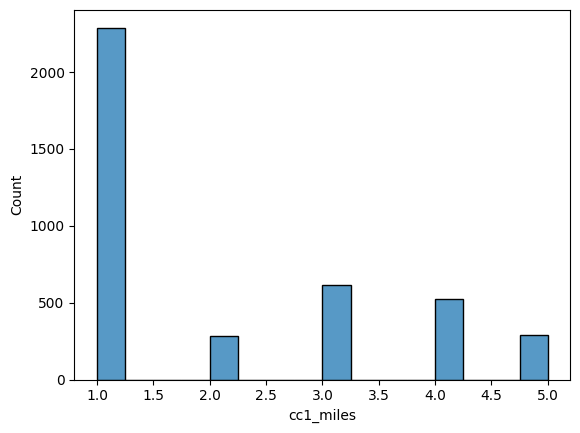

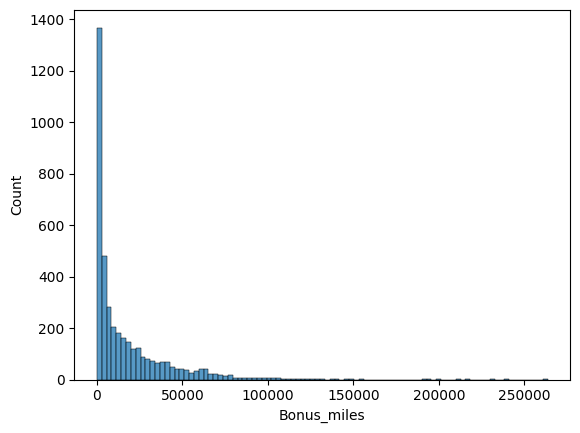

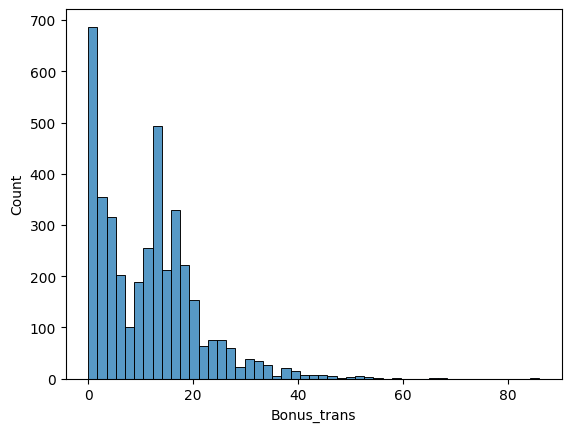

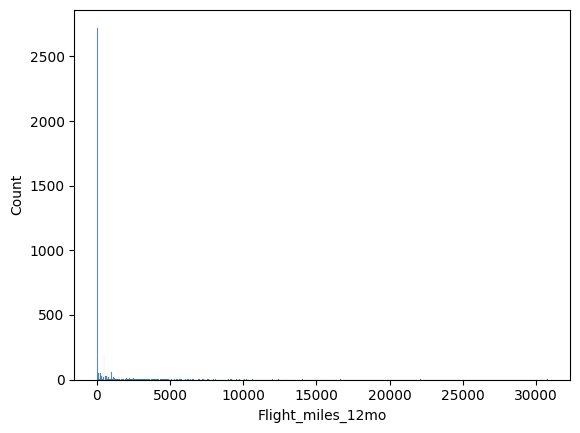

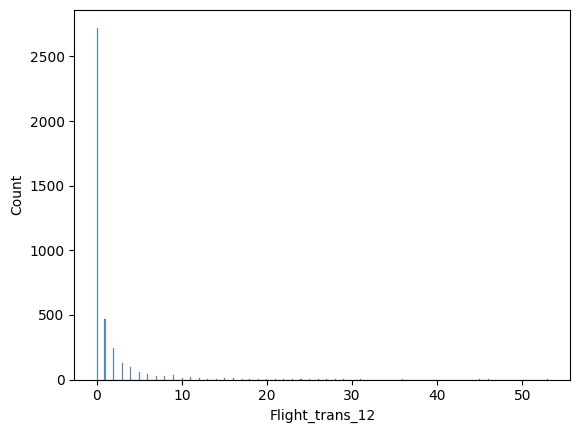

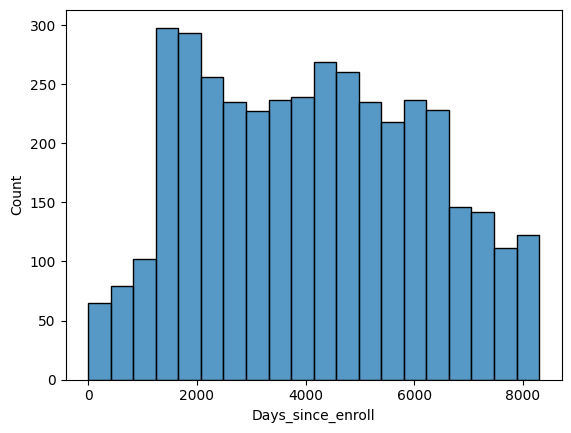

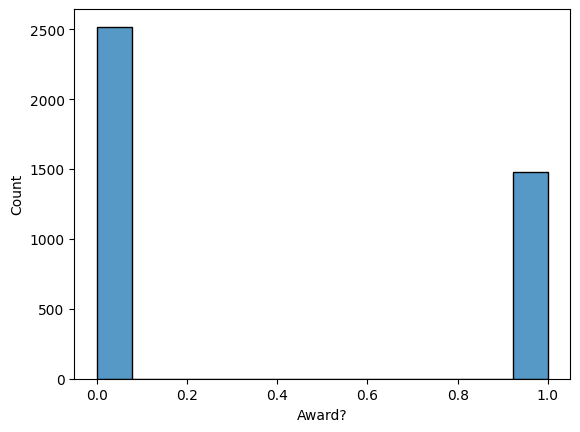

In [ ]:
for n in data.columns:
  sns.histplot(data[n])
  plt.show()


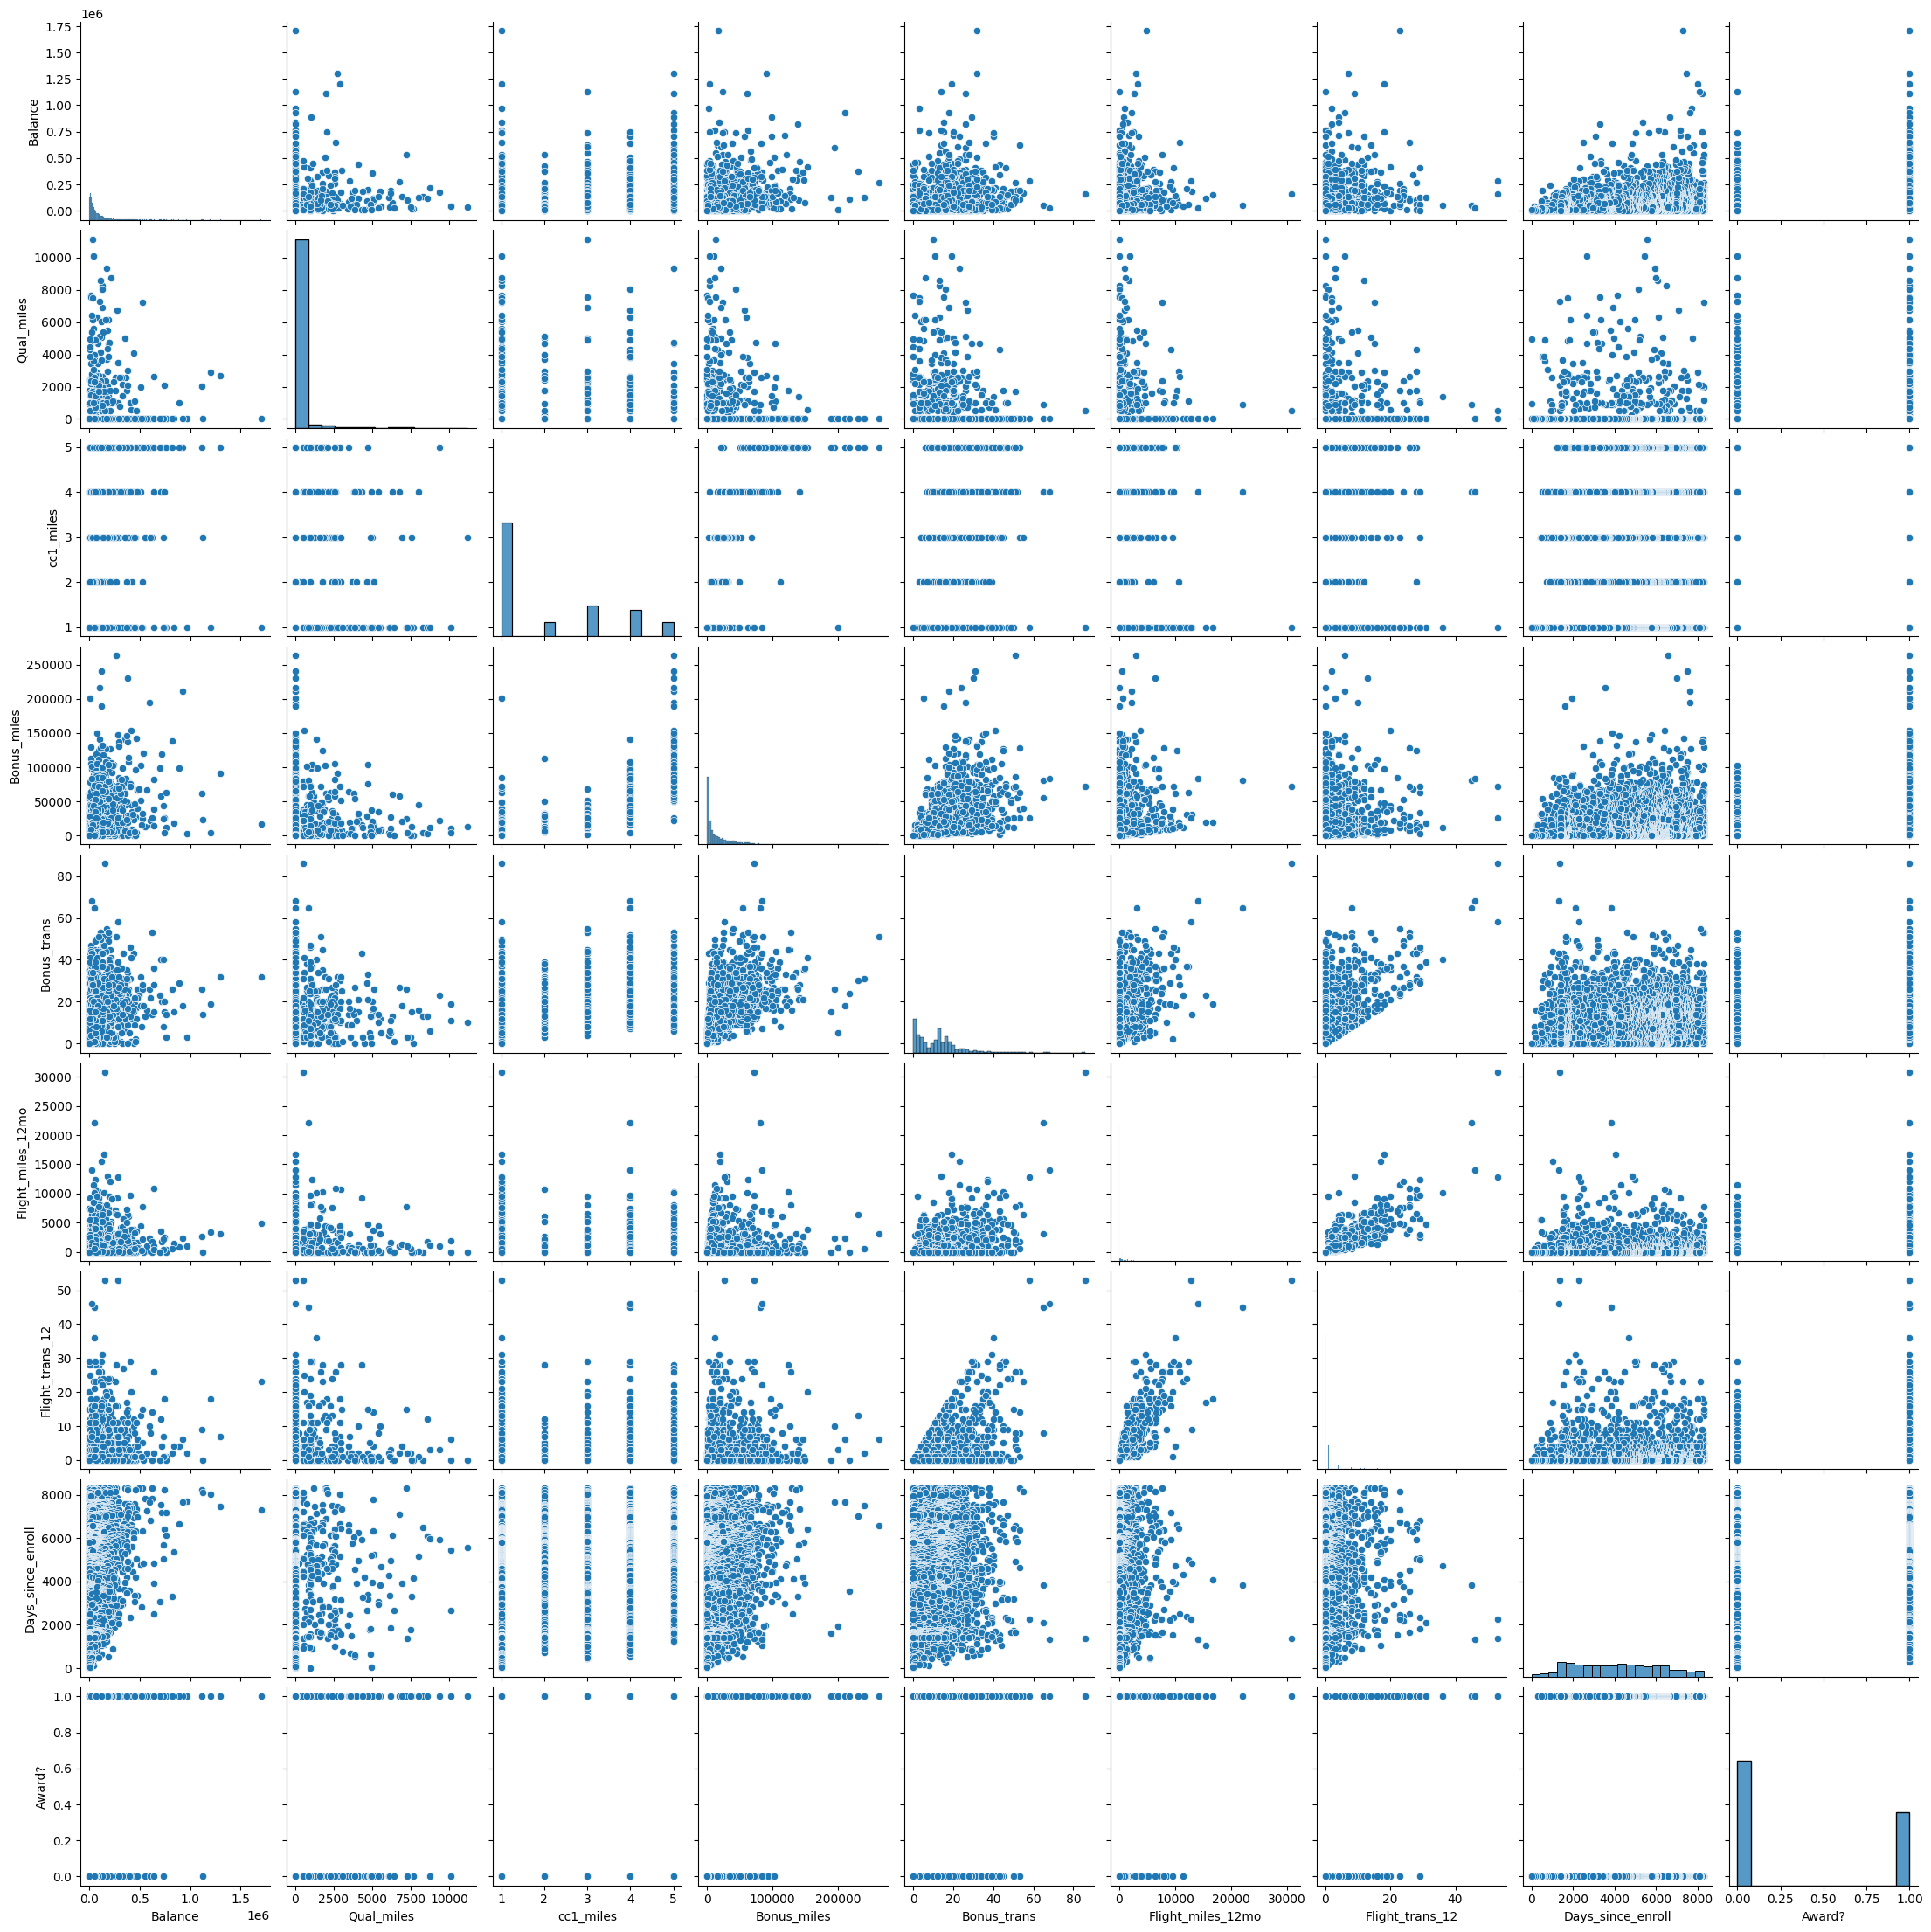

In [ ]:
sns.pairplot(data)
plt.show()

<Axes: >

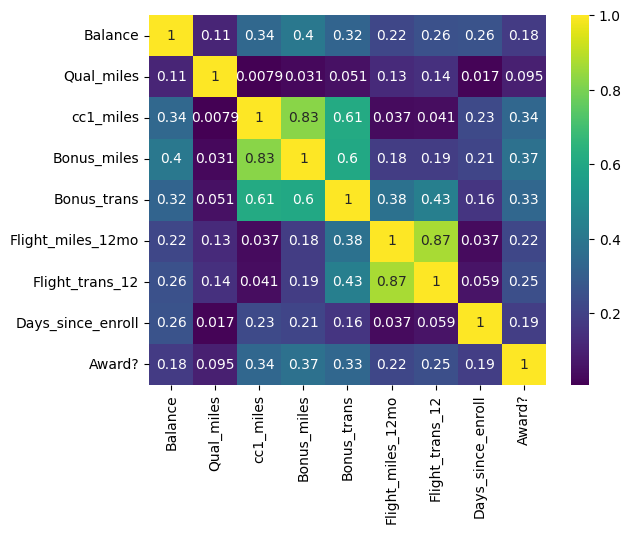

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

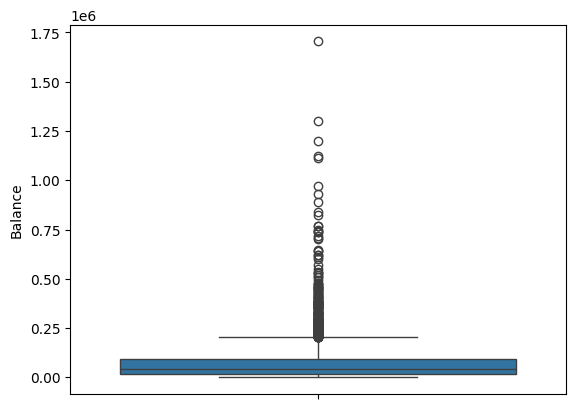

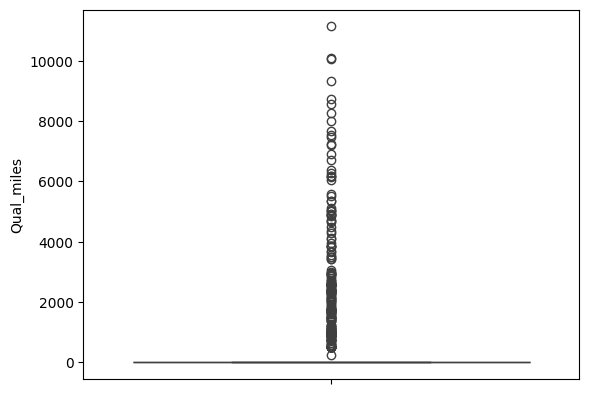

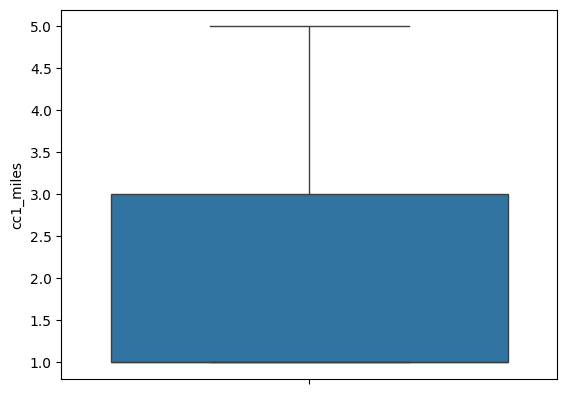

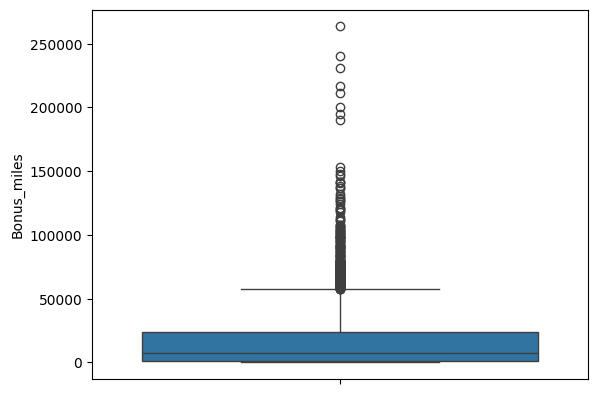

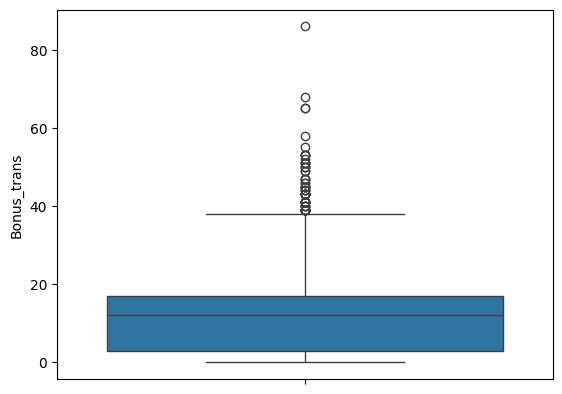

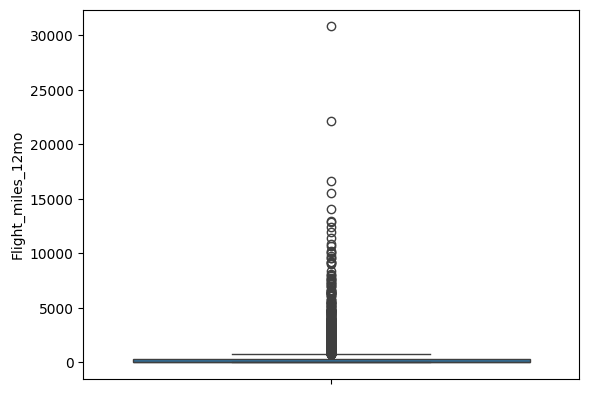

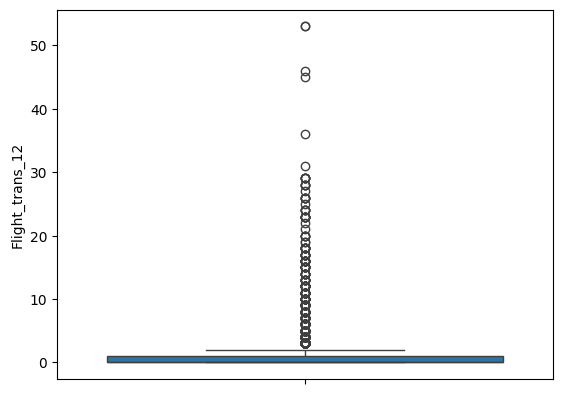

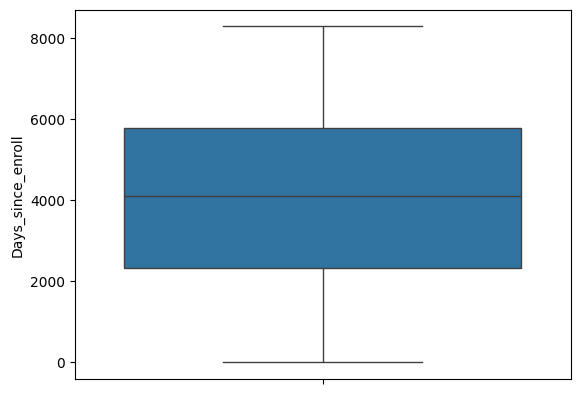

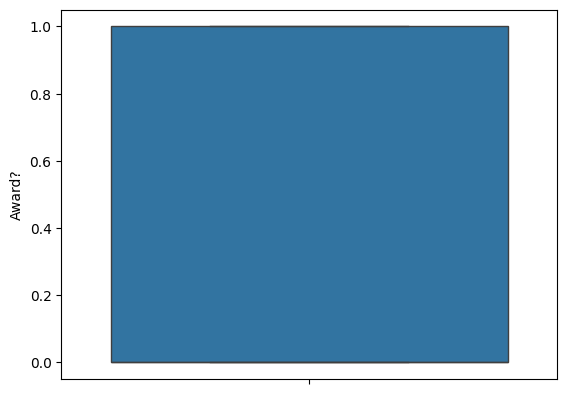

In [ ]:
#handle outliers
for n in data.columns:
  sns.boxplot(data[n])
  plt.show()

In [ ]:

# def outliers_finder(data,threshold=3):
#      outliers=[]

#      for n in data.columns:
#          z=np.abs((data[n]-data[n].mean()))/data[n].std()
#          outliers_index=np.where(z>threshold)
#          outliers.append(outliers_index[0].tolist())
#      return outliers





In [ ]:
# outliers=outliers_finder(data)
# outliers

In [ ]:
# wc can do ouliers in dataset then some many imp features can be drop so  they can't handle in ouliers

# are eliminating by doing so.

In [ ]:
data.drop(['Flight_trans_12'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data.head(10)

,Balance,Qual_miles,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.000660,0.011628,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.000815,0.023256,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.015636,0.046512,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.001896,0.011628,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.164211,0.302326,0.067398,0.835905,1.0
5,0.009631,0.0,0.00,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.104223,0.290698,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.019910,0.046512,0.008112,0.836267,1.0
8,0.259850,0.0,0.50,0.006648,0.500000,0.124931,0.837473,1.0
9,0.061507,0.0,0.50,0.107803,0.325581,0.037317,0.835423,1.0


# Implementing Clustering Algorithms:

# Hierarchical clustering

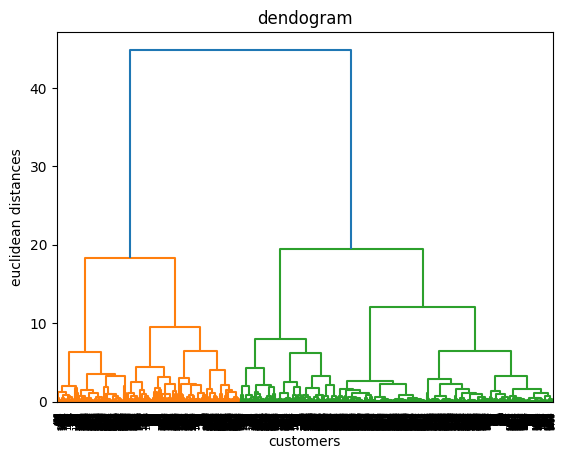

In [ ]:
# used hirerechial clustering
from scipy.cluster import hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('dendogram')
plt.xlabel('customers')
plt.ylabel('euclidean distances')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='average', metric='euclidean').fit(data)
y_hc = hc.fit_predict(data)

In [ ]:
y_hc

array([0, 0, 0, ..., 2, 3, 3])

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(data,y_hc)

0.6657526732419345

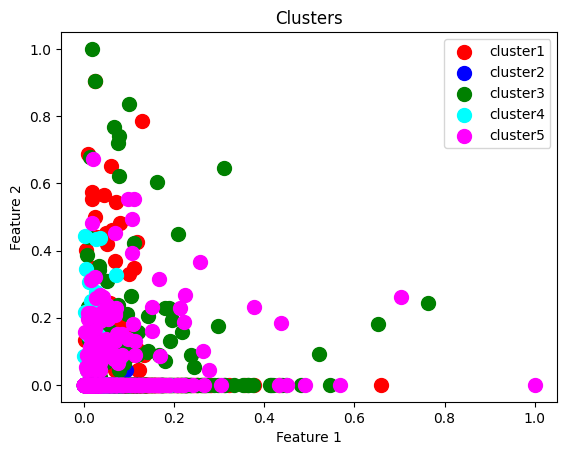

In [ ]:
plt.scatter(data.iloc[y_hc==0, 0],data.iloc[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(data.iloc[y_hc==1, 0],data.iloc[y_hc==1,1],s=100,c='blue',label='cluster2')
plt.scatter(data.iloc[y_hc==2, 0],data.iloc[y_hc==2,1],s=100,c='green',label='cluster3')
plt.scatter(data.iloc[y_hc==3, 0],data.iloc[y_hc==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(data.iloc[y_hc==4, 0],data.iloc[y_hc==4,1],s=100,c='magenta',label='cluster5')
plt.title('Clusters') # changed title for better representation
plt.xlabel('Feature 1') # changed xlabel for better representation
plt.ylabel('Feature 2') # changed ylabel for better representation
plt.legend()
plt.show()

# Kmeans Clustering

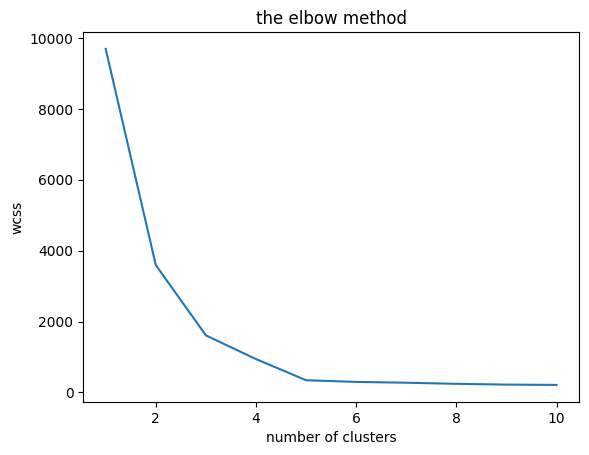

In [ ]:
from sklearn.cluster import  KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)


In [ ]:
y_kmeans

array([1, 1, 1, ..., 2, 3, 3], dtype=int32)

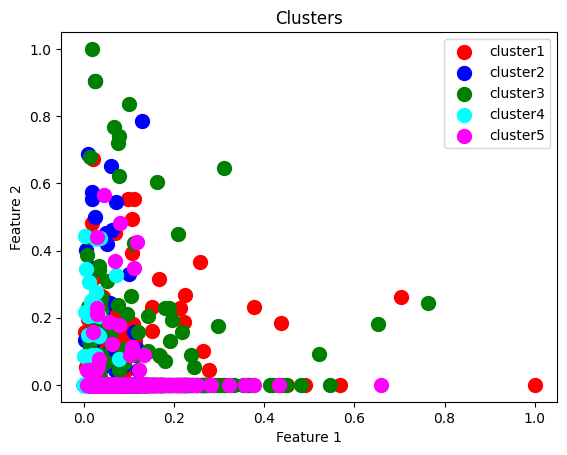

In [ ]:
plt.scatter(data.iloc[y_kmeans==0, 0],data.iloc[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(data.iloc[y_kmeans==1, 0],data.iloc[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(data.iloc[y_kmeans==2, 0],data.iloc[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(data.iloc[y_kmeans==3, 0],data.iloc[y_kmeans==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(data.iloc[y_kmeans==4, 0],data.iloc[y_kmeans==4,1],s=100,c='magenta',label='cluster5')
plt.title('Clusters') # changed title for better representation
plt.xlabel('Feature 1') # changed xlabel for better representation
plt.ylabel('Feature 2') # changed ylabel for better representation
plt.legend()
plt.show()


# DBSCAN CLUSTERING

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=5)
y_dbscan=dbscan.fit_predict(data)

In [ ]:
y_dbscan

array([0, 0, 0, ..., 1, 4, 4])

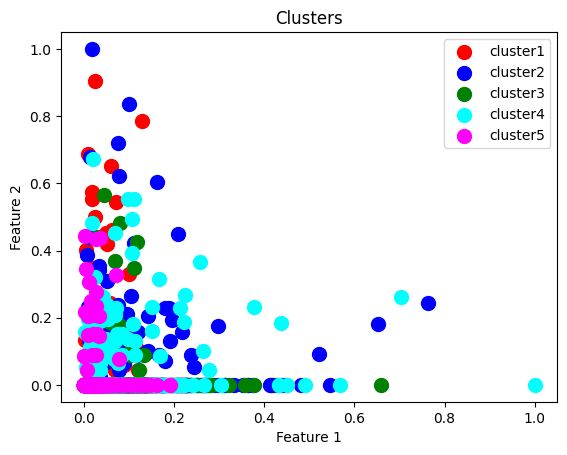

In [ ]:
plt.scatter(data.iloc[y_dbscan==0, 0],data.iloc[y_dbscan==0,1],s=100,c='red',label='cluster1')
plt.scatter(data.iloc[y_dbscan==1, 0],data.iloc[y_dbscan==1,1],s=100,c='blue',label='cluster2')
plt.scatter(data.iloc[y_dbscan==2, 0],data.iloc[y_dbscan==2,1],s=100,c='green',label='cluster3')
plt.scatter(data.iloc[y_dbscan==3, 0],data.iloc[y_dbscan==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(data.iloc[y_dbscan==4, 0],data.iloc[y_dbscan==4,1],s=100,c='magenta',label='cluster5')
plt.title('Clusters') # changed title for better representation
plt.xlabel('Feature 1') # changed xlabel for better representation
plt.ylabel('Feature 2') # changed ylabel for better representation
plt.legend()
plt.show()